In [1]:
import os
import importlib  # used to reload modules if necessary
path_to_frontend = '..'
os.chdir(path_to_frontend)
import q100viz.session as session
import q100viz.devtools as devtools
import q100viz.graphics.graphs as graphs

pygame 2.1.2 (SDL 2.0.16, Python 3.10.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


Exception in thread Thread-5 (run):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dunland/github/qScope/qScope_frontend/q100viz/api.py", line 16, in run
    self.io.connect(socket_addr)
  File "/home/dunland/.local/lib/python3.10/site-packages/socketio/client.py", line 338, in connect
    raise exceptions.ConnectionError(exc.args[0]) from None
socketio.exceptions.ConnectionError: HTTPConnectionPool(host='localhost', port=8081): Max retries exceeded with url: /socket.io/?transport=polling&EIO=4&t=1666427298.481671 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fa71f67d7e0>: Failed to establish a new connection: [Errno 111] Connection refused'))


loading src_points: [[-3.700000000000001, 5.700000000000003], [-2.7000000000000033, 140.60000000000008], [117.69999999999996, 137.8], [117.39999999999998, 1.5000000000000013]]
loading dst_points: [[80, 45], [80, 1035], [1840, 1035], [1840, 45]]


/home/dunland/github/qScope/qScope_frontend/q100viz/buildings.py:37: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bestand = bestand.drop('Kataster_S', 1)
/home/dunland/github/qScope/qScope_frontend/q100viz/buildings.py:38: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bestand = bestand.drop('Kataster_H', 1)


In [2]:
# prepare simulation:
devtools.select_buildings_for_simulation(session.buildings.df, ['7.31', '7.32', '7.53', '7.54'])
# session.buildings.df['selected'] = True

id
7.32    3.0
7.31    2.0
7.54    2.0
7.53    0.0
Name: group, dtype: float64


In [ ]:
# start simulation:
session.simulation.activate(max_year=2022)

In [ ]:
# create combined emissions graph:
importlib.reload(graphs)
graphs.export_combined_emissions(session.buildings.list_from_groups(), current_output_folder="/home/dunland/github/qScope/data/outputs/output_test", compare_data_folder="/home/dunland/github/qScope/data/precomputed/simulation_defaults")

In [ ]:
# create combined energy prices graph:
importlib.reload(graphs)
graphs.export_combined_energy_prices("/home/dunland/github/qScope/data/outputs/output_test", outfile=None, compare_data_folder="/home/dunland/github/qScope/data/precomputed/simulation_defaults")

[Errno 2] No such file or directory: '/home/dunland/github/qScope/data/outputs/output_test/emissions/CO2_emissions_7.53.csv' ... probably the selected buildings have changed between the rounds
[Errno 2] No such file or directory: '/home/dunland/github/qScope/data/outputs/output_test/emissions/CO2_emissions_7.31.csv' ... probably the selected buildings have changed between the rounds
[Errno 2] No such file or directory: '/home/dunland/github/qScope/data/outputs/output_test/emissions/CO2_emissions_7.54.csv' ... probably the selected buildings have changed between the rounds
[Errno 2] No such file or directory: '/home/dunland/github/qScope/data/outputs/output_test/emissions/CO2_emissions_7.32.csv' ... probably the selected buildings have changed between the rounds


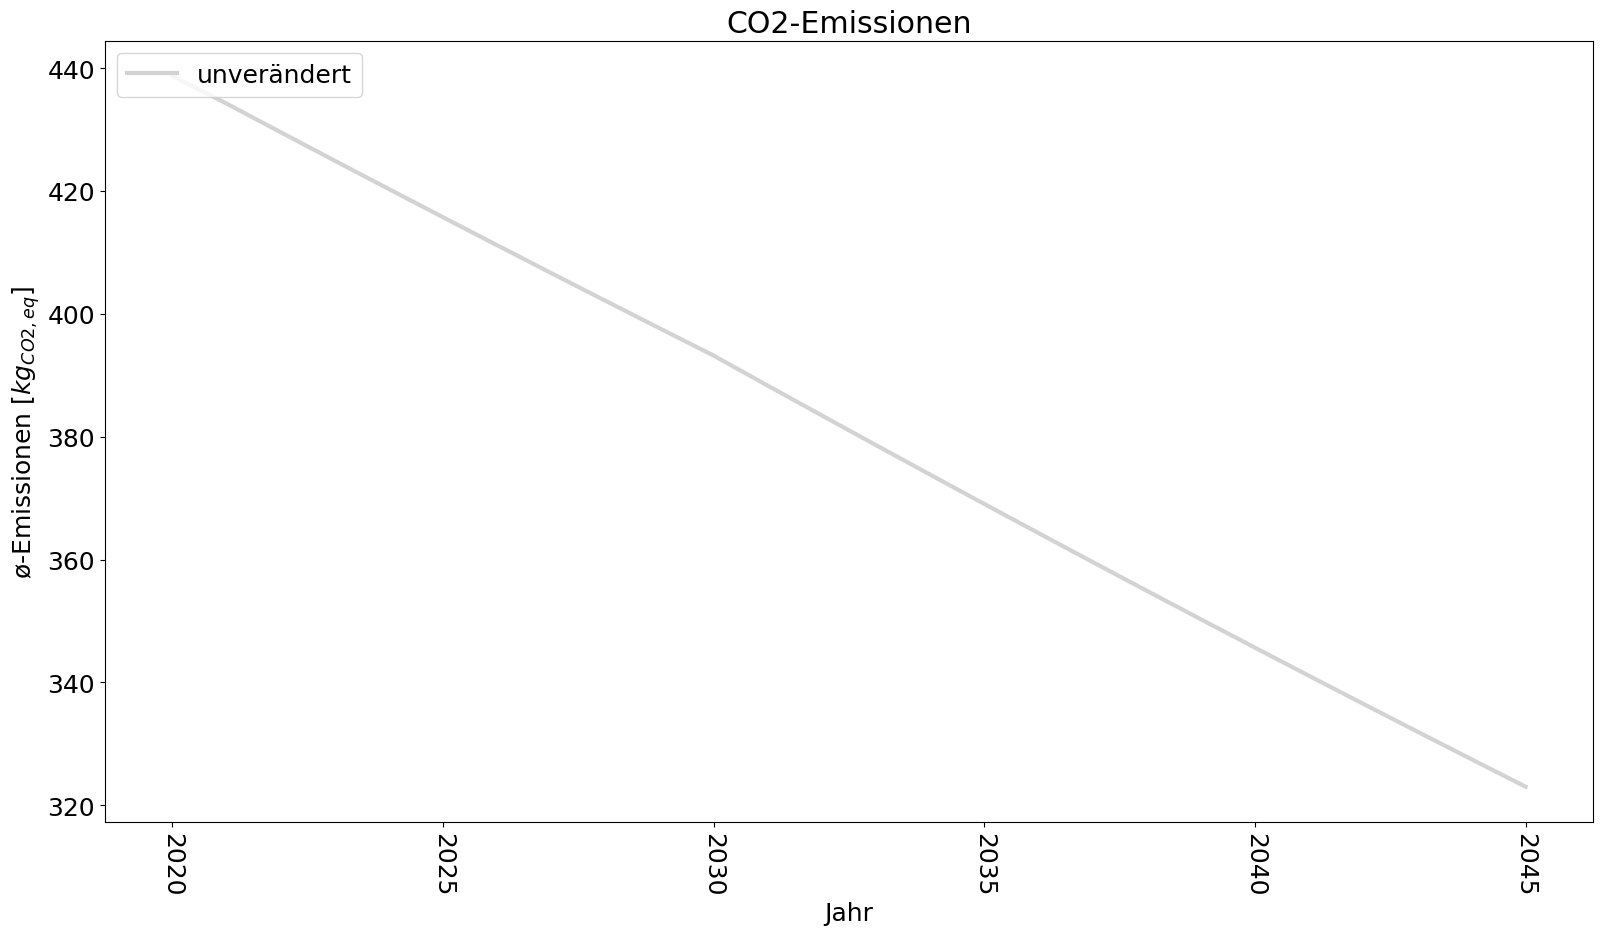

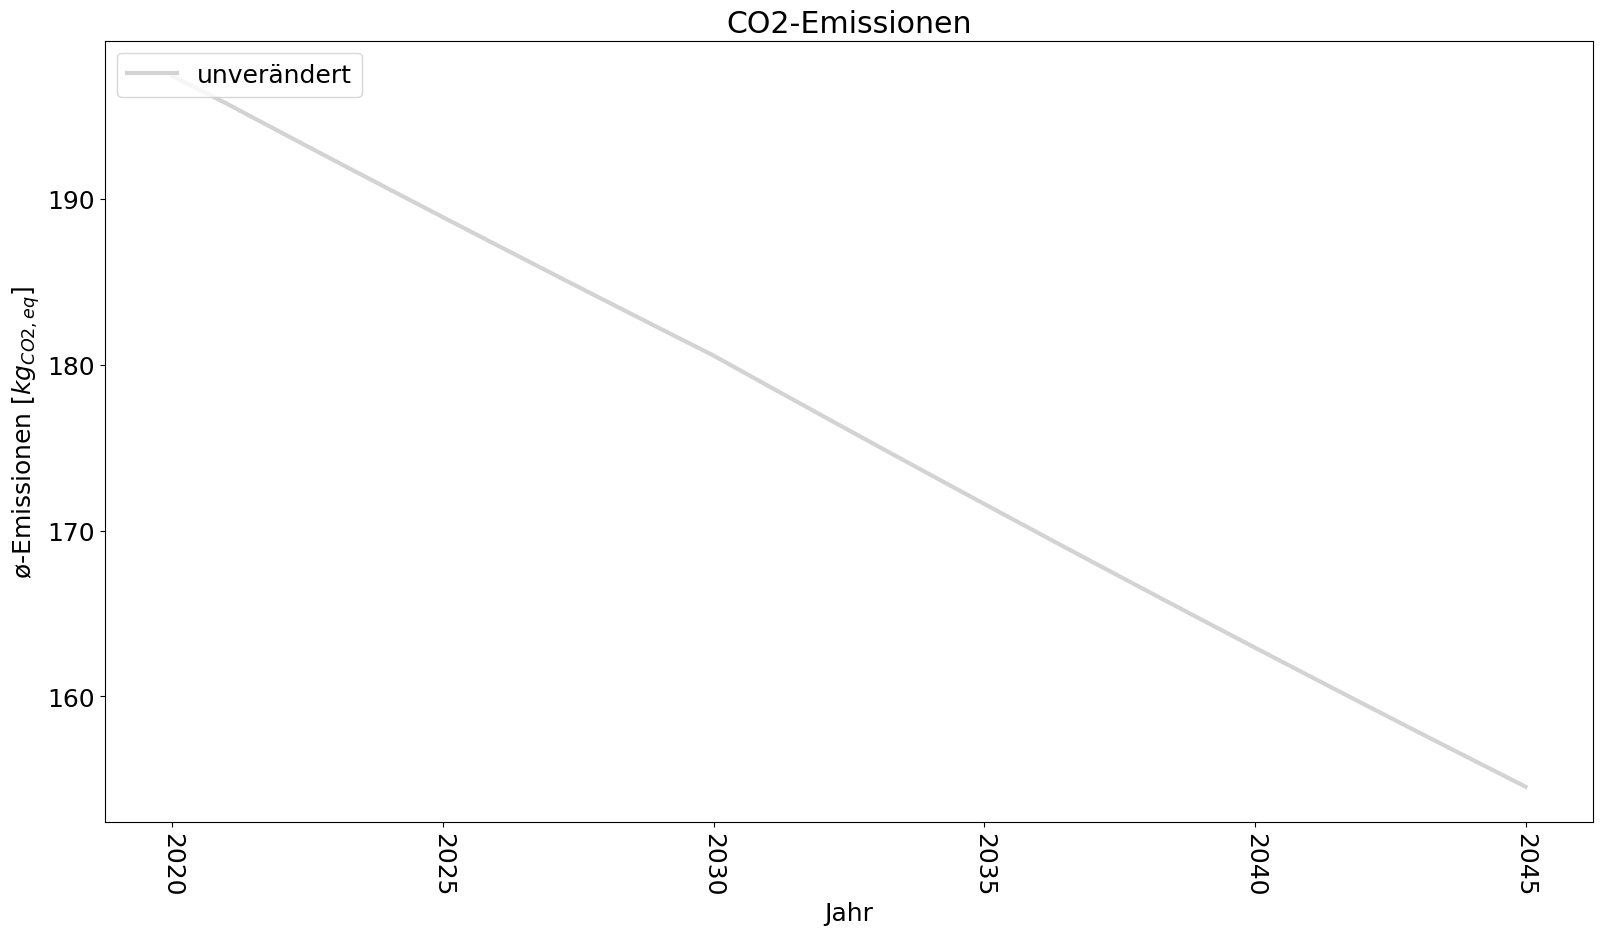

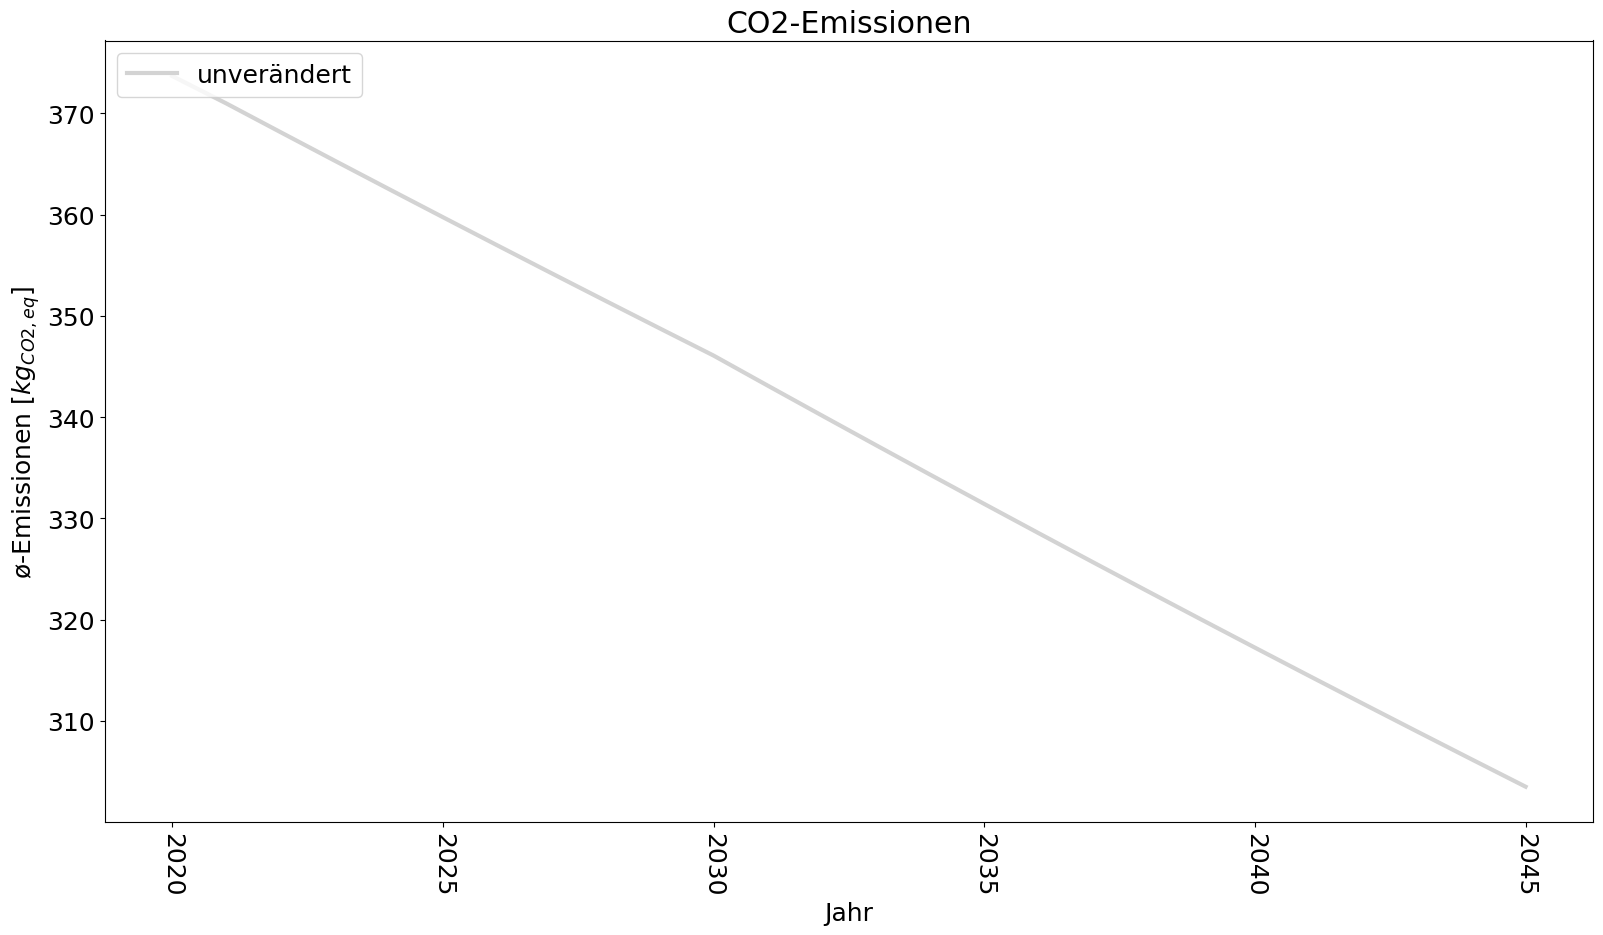

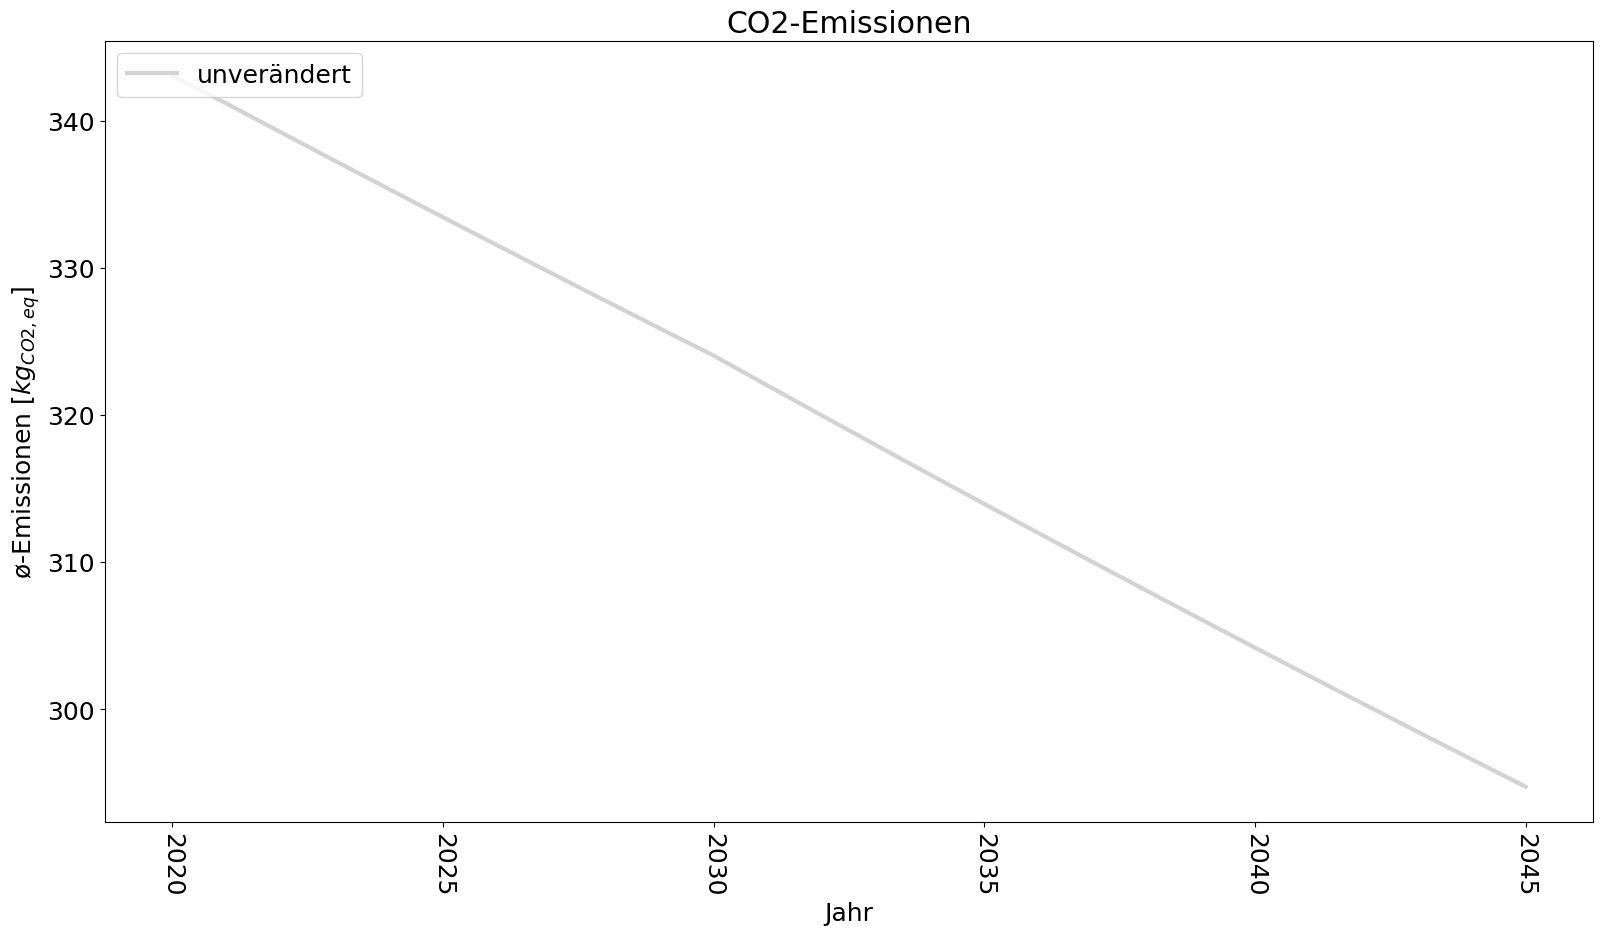

In [5]:
# create individual graphs:
importlib.reload(graphs)
output_folder = "/home/dunland/github/qScope/data/outputs/output_test"
for group_df in session.buildings.list_from_groups():
    if group_df is not None:
        for idx in group_df.index:

            # export emissions graph:
            graphs.export_individual_graph(
                csv_name="/emissions/CO2_emissions_{0}.csv".format(
                    idx),
                data_folders=[output_folder],
                columns=['building_household_emissions'],
                title_="CO2-Emissionen",
                outfile=None,
                xlabel_="Jahr",
                ylabel_="ø-Emissionen [$kg_{CO2,eq}$]",
                x_='current_date',
                convert_grams_to_kg=True,
                compare_data_folder=output_folder + "/../../precomputed/simulation_defaults"
            )